## Project: Movie Review Sentiment Analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Ali
[nltk_data]     Raza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing/Loading Dataset
df = pd.read_csv('E:\Developers_Hub\movie_review_dataset.csv')
df

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_14324\2190674732.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('E:\Developers_Hub\movie_review_dataset.csv')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# Checking 'sentiment' values
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [4]:
# Deleting duplicates and missing values in dataset
df.dropna(inplace = True)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
# Cleaning stopwords from the 'text'
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [6]:
df['review'] = df['review'].apply(clean_review)
df['review']

0        One reviewers mentioned watching 1 Oz episode ...
1        wonderful little production. <br /><br />The f...
2        thought wonderful way spend time hot summer we...
3        Basically there's family little boy (Jake) thi...
4        Petter Mattei's "Love Time Money" visually stu...
                               ...                        
49995    thought movie right good job. creative origina...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    Catholic taught parochial elementary schools n...
49998    going disagree previous comment side Maltin on...
49999    one expects Star Trek movies high art, fans ex...
Name: review, Length: 50000, dtype: object

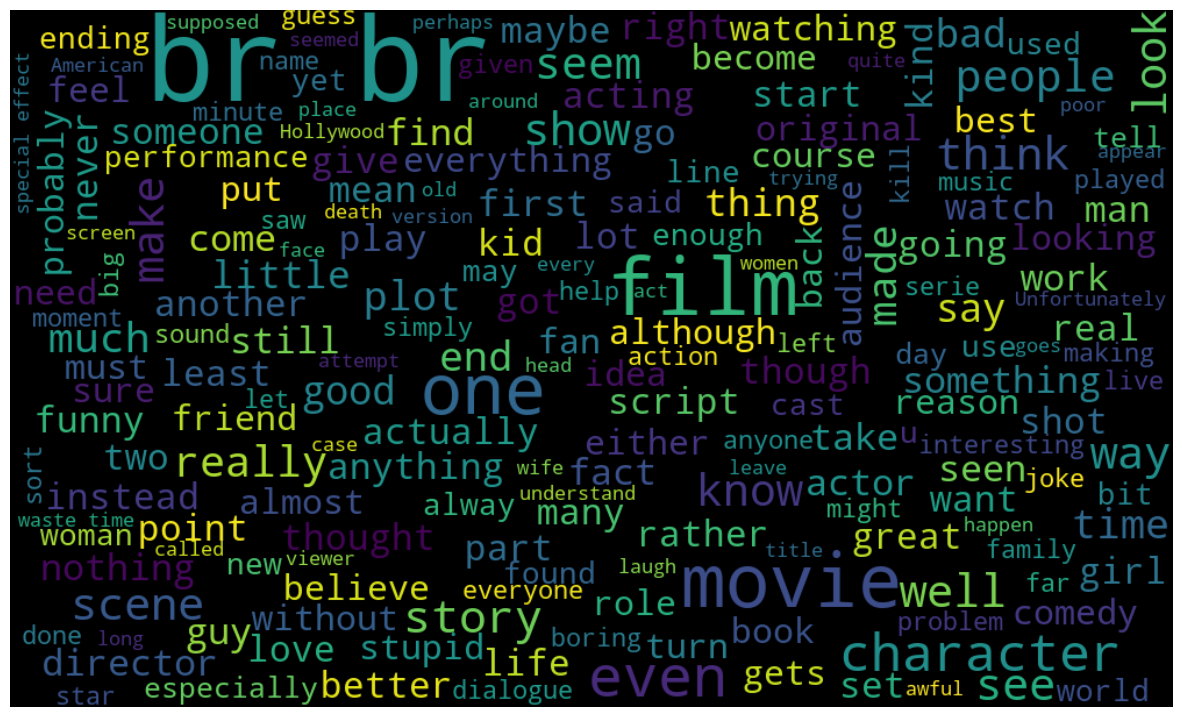

In [7]:
# Creating wordcloud for 'negative' in 'sentiment'
from wordcloud import WordCloud
reviews = " ".join(word for word in df['review'][df['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size = 100)
plt.figure(figsize = (15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation = 'bilinear')
plt.axis('off')
plt.show()

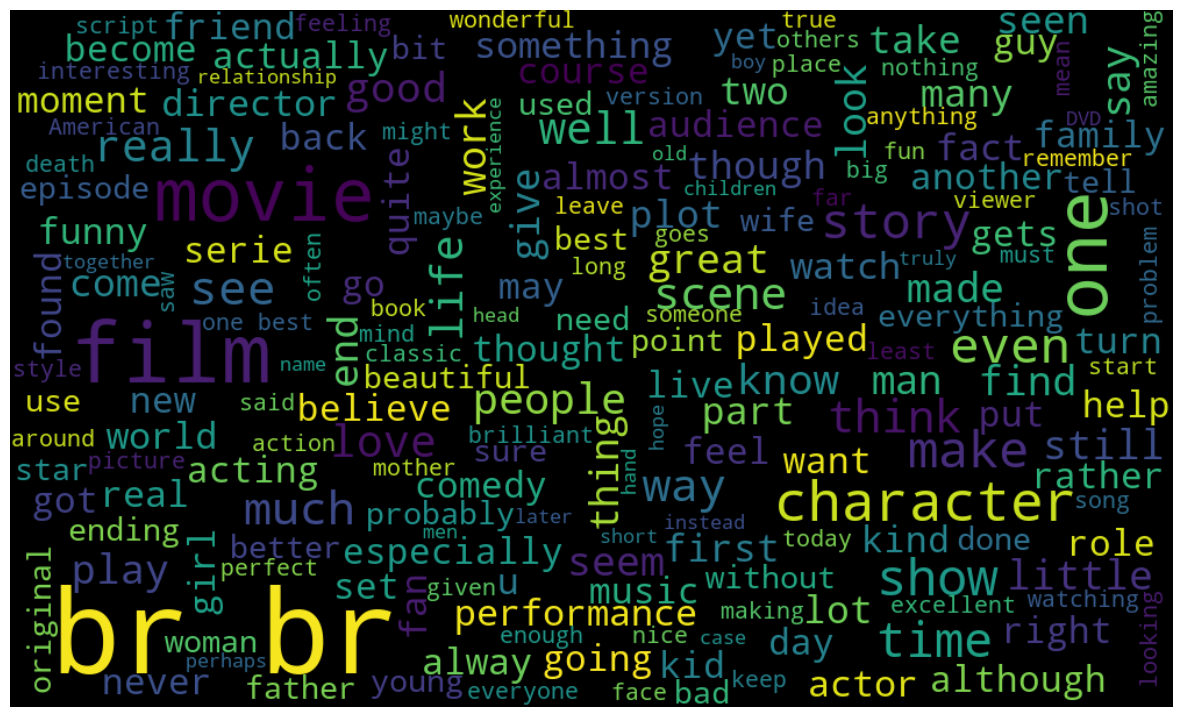

In [8]:
# Creating wordcloud for 'positive' in 'sentiment'
reviews = " ".join(word for word in df['review'][df['sentiment'] == 'positive'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size = 100)
plt.figure(figsize = (15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [9]:
# Changing text data into vectorise form 
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 1500)
# Fitting and transforming the text data into vectorise form 
reviews = cv.fit_transform(df['review']).toarray()

In [10]:
# Replacing the values of 'positive' and 'negative' with '1' and '0' respectively
df['sentiment'] = df['sentiment'].replace(['positive', 'negative'],[1, 0])

C:\Users\Ali Raza\AppData\Local\Temp\ipykernel_14324\1233388014.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace(['positive', 'negative'],[1, 0])


In [11]:
df['sentiment'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64>

In [16]:
# Creating model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
# Splitting dataset into training and testing sets (80/20)
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, df['sentiment'], test_size = 0.2)


In [ ]:
# Fitting our model
model.fit(reviews_train, sent_train)

LogisticRegression()

In [20]:
# Making prediction
predict = model.predict(reviews_test)

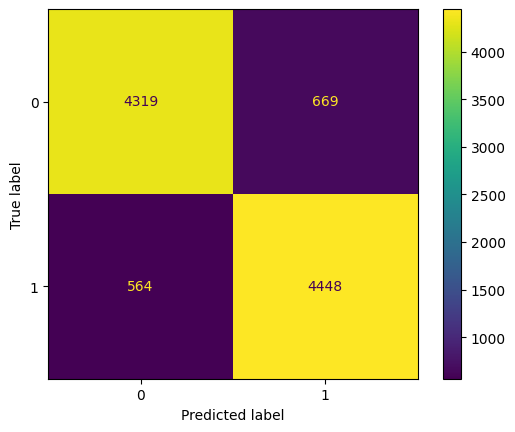

In [23]:
# Making and Displaying Confuson metrix of model 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels = model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
display.plot() 
plt.show() 

In [25]:
# Saving our model
import pickle as pk
pk.dump(model, open("model.pk1", "wb"))
pk.dump(cv, open("cv.pk2","wb"))